In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
d = pd.read_csv('auto-mpg.csv')
X = d.drop('mpg',axis='columns')
y = d.mpg

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [16]:
def experiment(base_model, alphas):
    coefficients = list()   # model parameters (beta)
    nonzero = list()        # non zero parameters

    for alpha in alphas:
        model = make_pipeline(
            PolynomialFeatures(degree=2),
            StandardScaler(),
            base_model(alpha=alpha, max_iter=100000)
        )
        model.fit(X,y)
        coefficients.append(model[-1].coef_)
        nonzero.append(len([c for c in model[-1].coef_ if c != 0]))

    return np.transpose(coefficients), nonzero

In [17]:
def plot_results(coefficients, nonzeros, alphas):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

    ax = axes.flat[0]

    for c in coefficients:
        ax.plot(alphas, c)
    
    ax.set_xscale('log')
    ax.set_xlabel('Regularisation hyperparameter (log scale)')
    ax.set_ylabel('Model parameter values')

    ax = axes.flat[1]
    ax.plot(alphas, nonzeros)
    ax.set_xscale('log')
    ax.set_xlabel('Regularisation hyperparameter (log scale)')
    ax.set_ylabel('Number of nonzero parameters')

    return fig, axes

In [18]:
from sklearn.linear_model import Lasso, Ridge

(<Figure size 1000x600 with 2 Axes>,
 array([<AxesSubplot: xlabel='Regularisation hyperparameter (log scale)', ylabel='Model parameter values'>,
        <AxesSubplot: xlabel='Regularisation hyperparameter (log scale)', ylabel='Number of nonzero parameters'>],
       dtype=object))

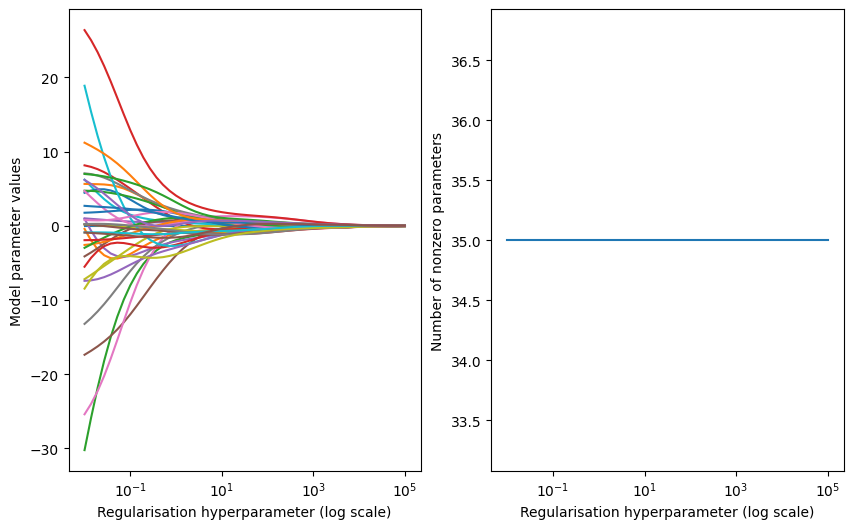

In [19]:
alphas = np.logspace(-2,5,50)
coefficients, nonzeros = experiment(Ridge, alphas)
plot_results(coefficients, nonzeros, alphas)

C:\Users\Aravind\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.035e+02, tolerance: 2.382e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Aravind\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.208e+02, tolerance: 2.382e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Aravind\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check t

(<Figure size 1000x600 with 2 Axes>,
 array([<AxesSubplot: xlabel='Regularisation hyperparameter (log scale)', ylabel='Model parameter values'>,
        <AxesSubplot: xlabel='Regularisation hyperparameter (log scale)', ylabel='Number of nonzero parameters'>],
       dtype=object))

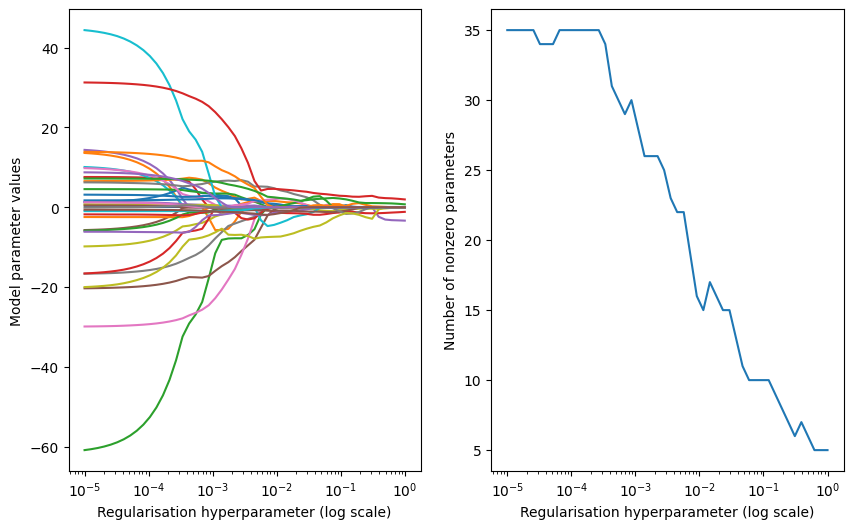

In [21]:
alphas = np.logspace(-5,0,50)
coefficients, nonzeros = experiment(Lasso, alphas)
plot_results(coefficients, nonzeros, alphas)